## CAR SALES PREDICTION MODEL




# Problem statement

The objective of this project is to develop a predictive model that accurately estimates the purchase amount a customer is likely to spend on a car, based on their demographic and financial information

# Dataset description
1. customer name	The name of the customer.	Text
2. customer e-mail	The email address of the customer.	Text
3. country	The country of residence of the customer.	Categorical
4. gender	The gender of the customer (e.g., Male, Female).	Categorical
4. age	The age of the customer in years.	Numerical
5. annual Salary	The annual salary of the customer in dollars.	Numerical
6. credit card debt	The total credit card debt of the customer in dollars.	Numerical
7. net worth	The estimated net worth of the customer in dollars.	Numerical
8. car purchase amount	The amount the customer spent on purchasing a car in dollars. This is the target variable for prediction.	Numerical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/car_purchasing.csv', encoding='latin1')
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
data.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [ ]:
data.shape

(500, 9)

In [ ]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
data.isnull().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dtypes

,0
customer name,object
customer e-mail,object
country,object
gender,int64
age,float64
annual Salary,float64
credit card debt,float64
net worth,float64
car purchase amount,float64


In [ ]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

EDA of the data

Here we can see Top 10 Customers by Total Purchase Amount


<ipython-input-31-95bb2636d721>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_customers, x = 'car purchase amount', y = 'customer name', palette= 'colorblind' )


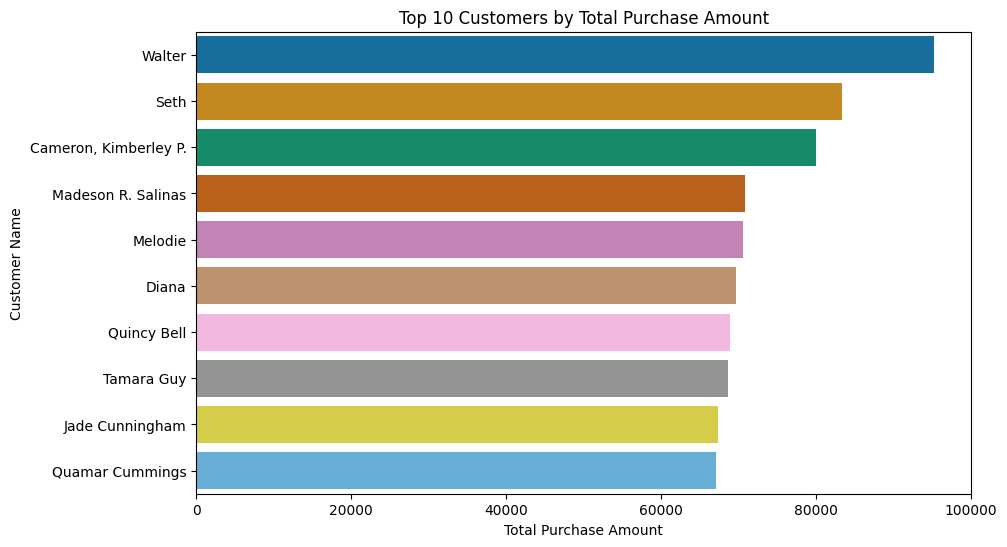

In [ ]:
#Top 10 customers

top_10_customers = data.groupby('customer name')['car purchase amount'].sum().sort_values(ascending=False).head(10)

top_10_customers = pd.DataFrame({'customer name': top_10_customers.index, 'car purchase amount': top_10_customers.values})

plt.figure(figsize=(10,6))
sns.barplot(data = top_10_customers, x = 'car purchase amount', y = 'customer name', palette= 'colorblind' )
plt.xlabel('Total Purchase Amount')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Purchase Amount')
plt.show()

<ipython-input-32-2837f9ec0786>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = bottom_10_customers, x = 'car purchase amount', y = 'customer name', palette= 'colorblind' )


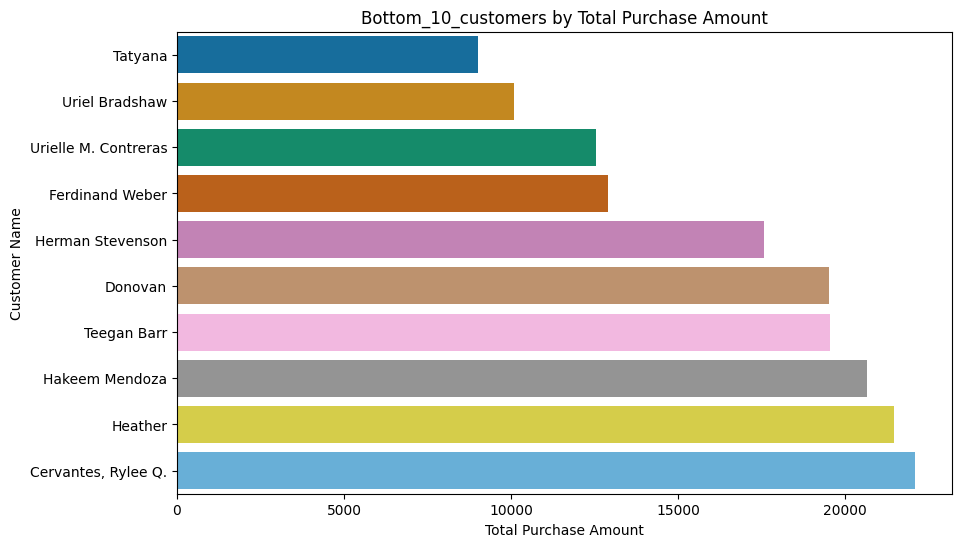

In [ ]:
#bottom 10 customers

bottom_10_customers = data.groupby('customer name')['car purchase amount'].sum().sort_values(ascending=True).head(10)

bottom_10_customers = pd.DataFrame({'customer name': bottom_10_customers.index, 'car purchase amount': bottom_10_customers.values})

plt.figure(figsize=(10,6))
sns.barplot(data = bottom_10_customers, x = 'car purchase amount', y = 'customer name', palette= 'colorblind' )
plt.xlabel('Total Purchase Amount')
plt.ylabel('Customer Name')
plt.title('Bottom_10_customers by Total Purchase Amount')
plt.show()

We can also see teh top 10 customers by disposable income

<ipython-input-34-ec516b5a34cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Top_10_customers_disposable_income, x = 'Disposable_income', y = 'customer name', palette= 'colorblind' )


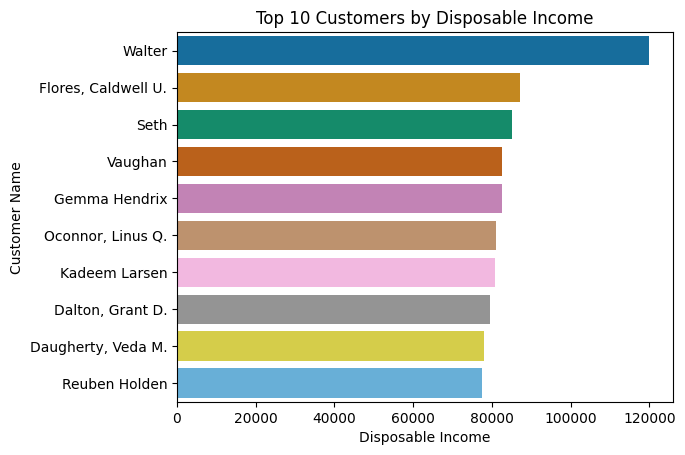

In [ ]:
data['Disposable_income'] = data['annual Salary'] - data['credit card debt']
Top_10_customers_disposable_income = data.groupby('customer name')['Disposable_income'].sum().sort_values(ascending=False).head(10)

Top_10_customers_disposable_income = pd.DataFrame({'customer name': Top_10_customers_disposable_income.index, 'Disposable_income': Top_10_customers_disposable_income.values})

sns.barplot(data = Top_10_customers_disposable_income, x = 'Disposable_income', y = 'customer name', palette= 'colorblind' )
plt.xlabel('Disposable Income')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Disposable Income')
plt.show()

<ipython-input-40-51d14c21b8ee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Bottom_10_customers_disposable_income, x = 'Disposable_income', y = 'customer name', palette= 'colorblind' )


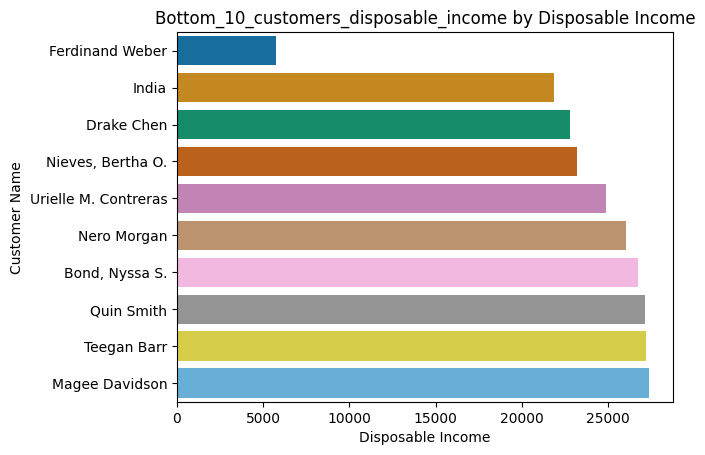

In [ ]:
data['Disposable_income'] = data['annual Salary'] - data['credit card debt']
Bottom_10_customers_disposable_income = data.groupby('customer name')['Disposable_income'].sum().sort_values(ascending=True).head(10)

Bottom_10_customers_disposable_income = pd.DataFrame({'customer name': Bottom_10_customers_disposable_income.index, 'Disposable_income': Bottom_10_customers_disposable_income.values})

sns.barplot(data = Bottom_10_customers_disposable_income, x = 'Disposable_income', y = 'customer name', palette= 'colorblind' )
plt.xlabel('Disposable Income')
plt.ylabel('Customer Name')
plt.title('Bottom_10_customers_disposable_income by Disposable Income')
plt.show()

we see by gender distribution that males and female customers are almost equal in number,

Text(0.5, 1.0, 'Gender Distribution')

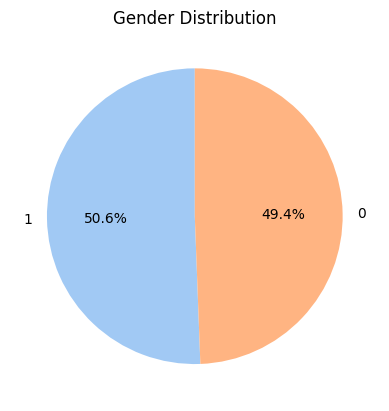

In [ ]:
gender_counts = data['gender'].value_counts()

plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')

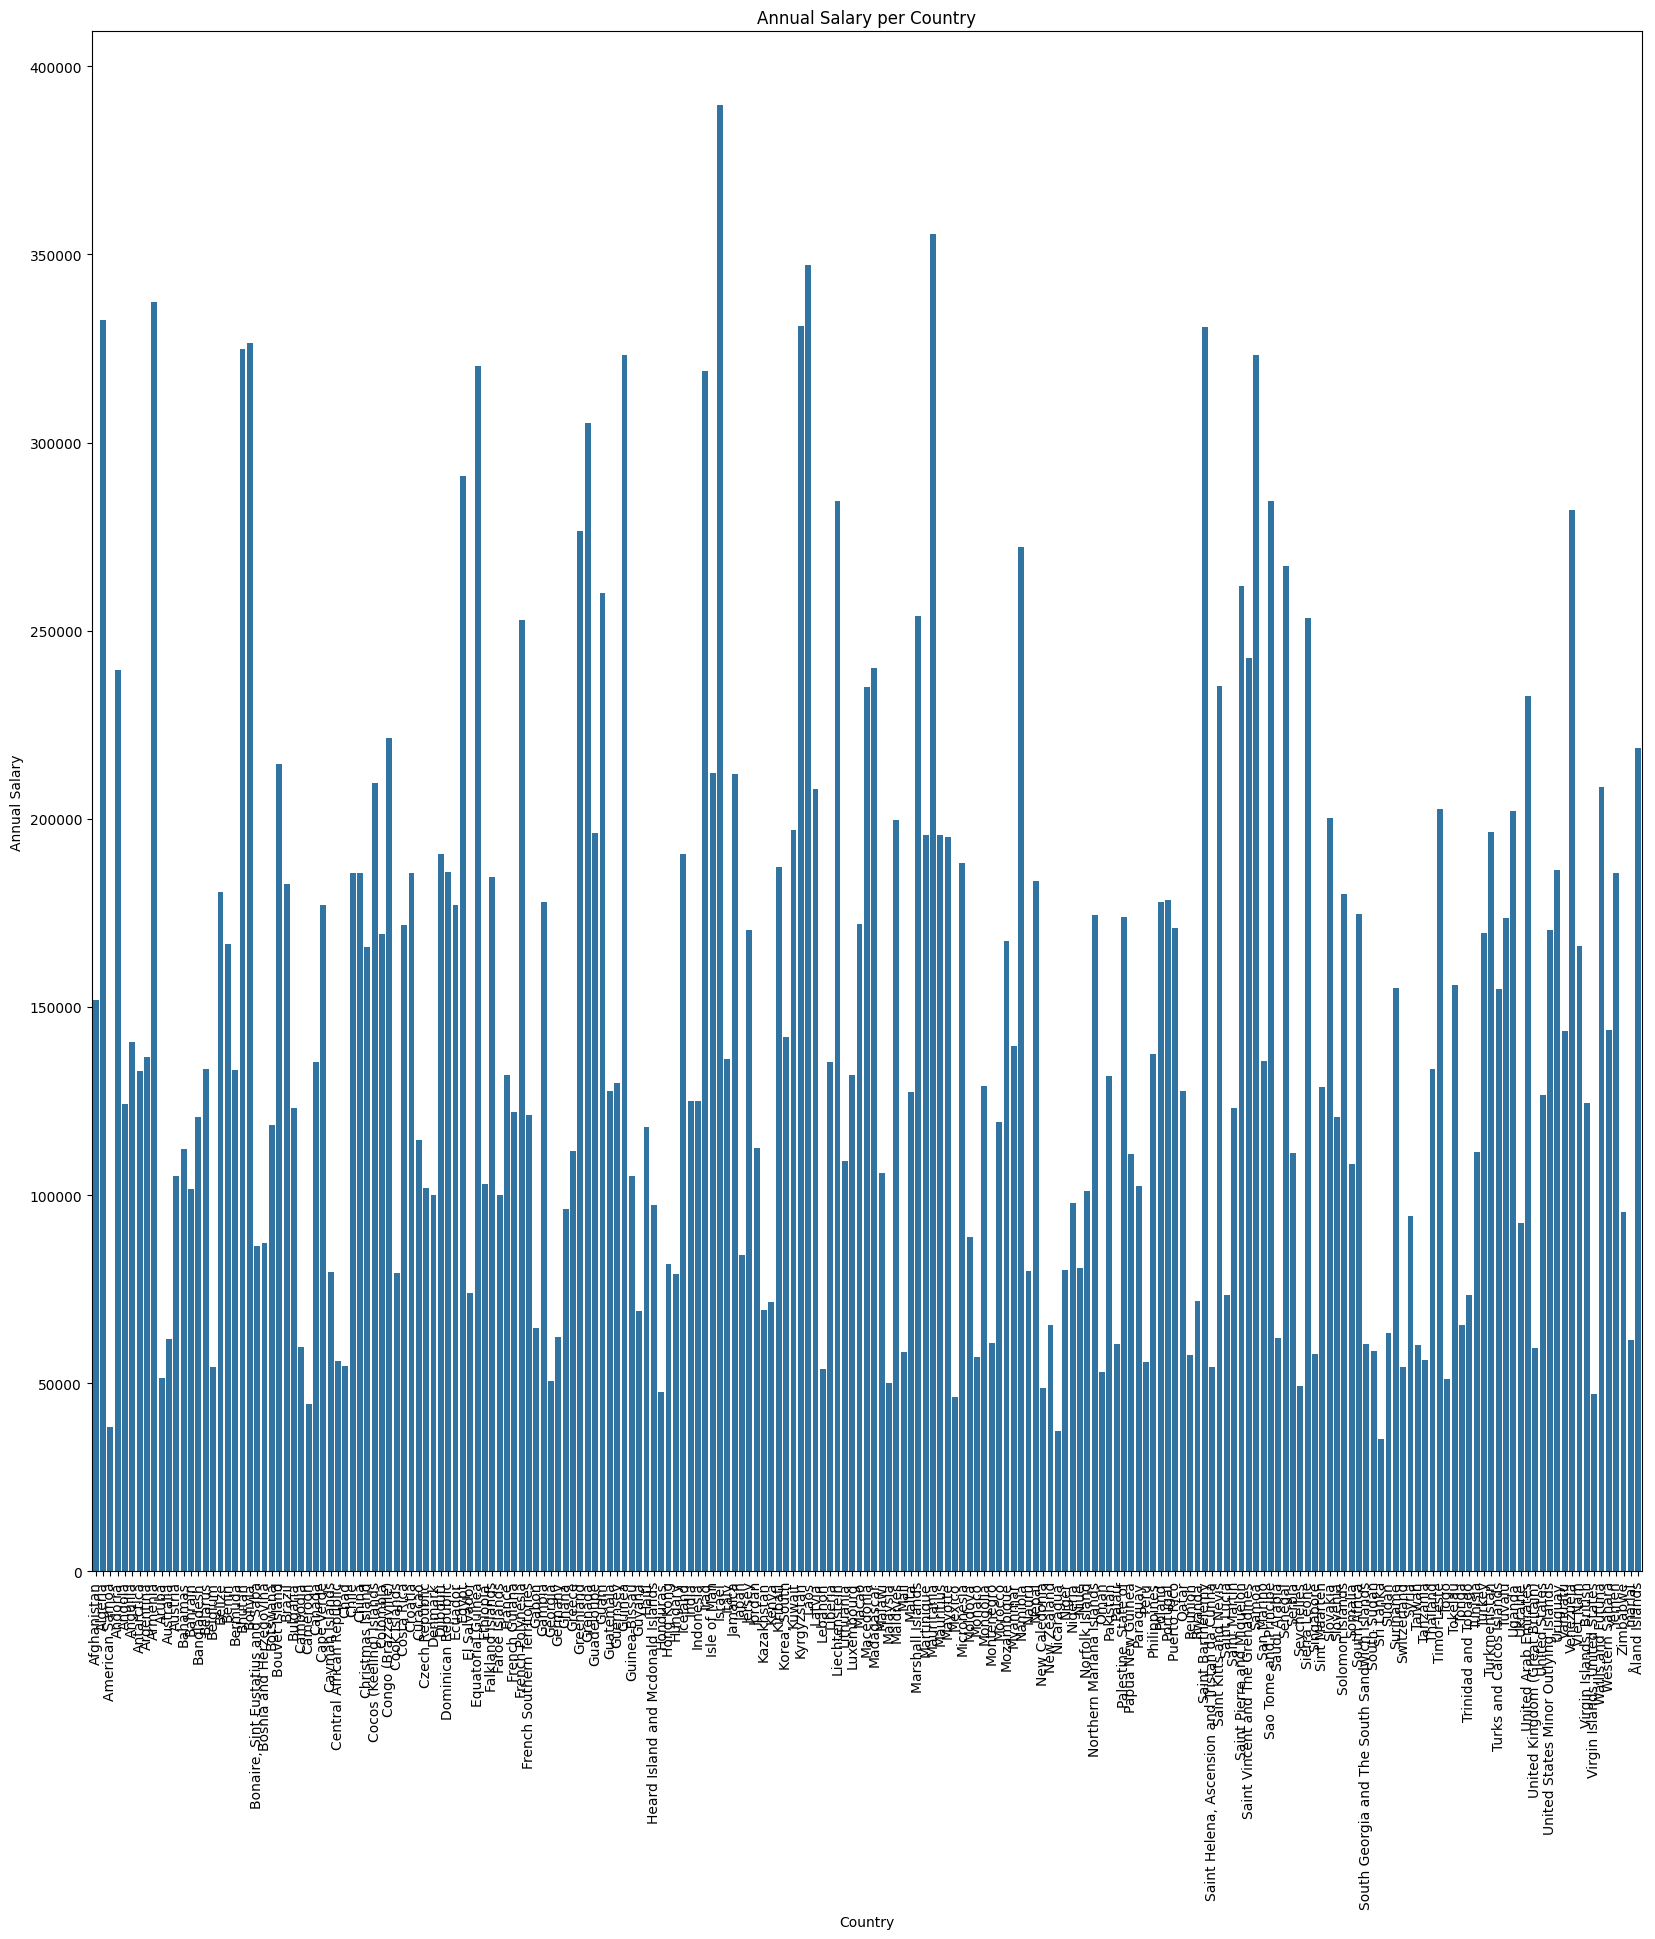

In [ ]:
#what is the sum of annual salary per country
annual_salary_per_country = data.groupby('country')['annual Salary'].sum()

annual_salary_per_country = pd.DataFrame({'country':annual_salary_per_country.index, 'annual_salary_per_country':annual_salary_per_country.values})

plt.figure(figsize=(20,20))
sns.barplot(data = annual_salary_per_country, x = 'country', y = 'annual_salary_per_country')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Annual Salary')
plt.title('Annual Salary per Country')
plt.show()

<ipython-input-70-2e0ecf8388ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_countries, x = 'country', y = 'car purchase amount',palette = 'bright' )


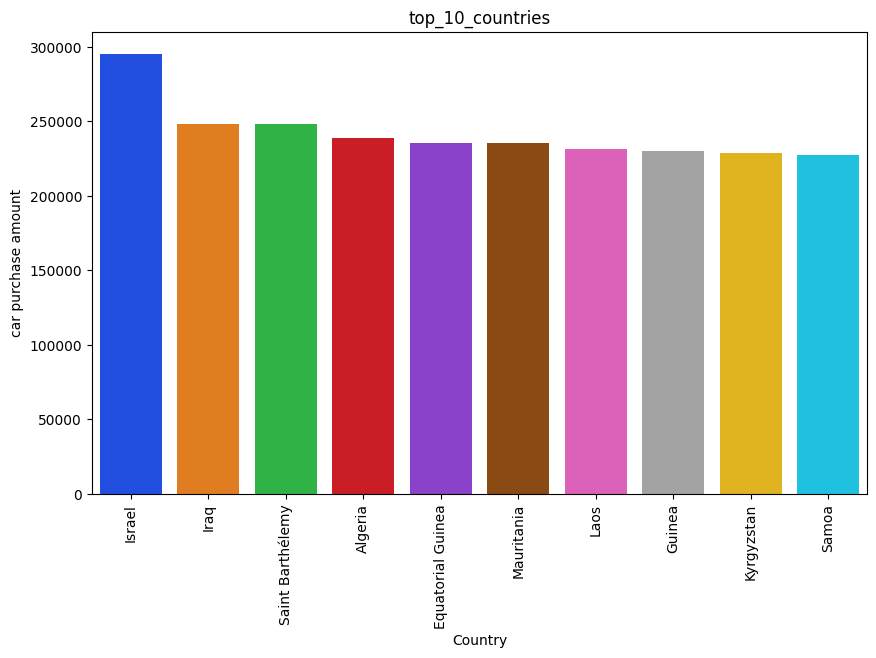

In [ ]:
top_10_countries = data.groupby('country')['car purchase amount'].sum().sort_values(ascending=False).head(10)

top_10_countries = pd.DataFrame({'country':top_10_countries.index, 'car purchase amount':top_10_countries.values})

plt.figure(figsize=(10,6))
sns.barplot(data = top_10_countries, x = 'country', y = 'car purchase amount',palette = 'bright' )
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('car purchase amount')
plt.title('top_10_countries')
plt.show()


Israel appears to be the top country in terms of car purchase ammount, this can be crucial in comparing market conditions and behaviour between the top countirs and the bottom countries so as to direct the best marketing strategy and resources towards them.

<ipython-input-71-afc28dcb3a41>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Bottom_10_countries, x = 'country', y = 'car purchase amount', palette = 'bright')


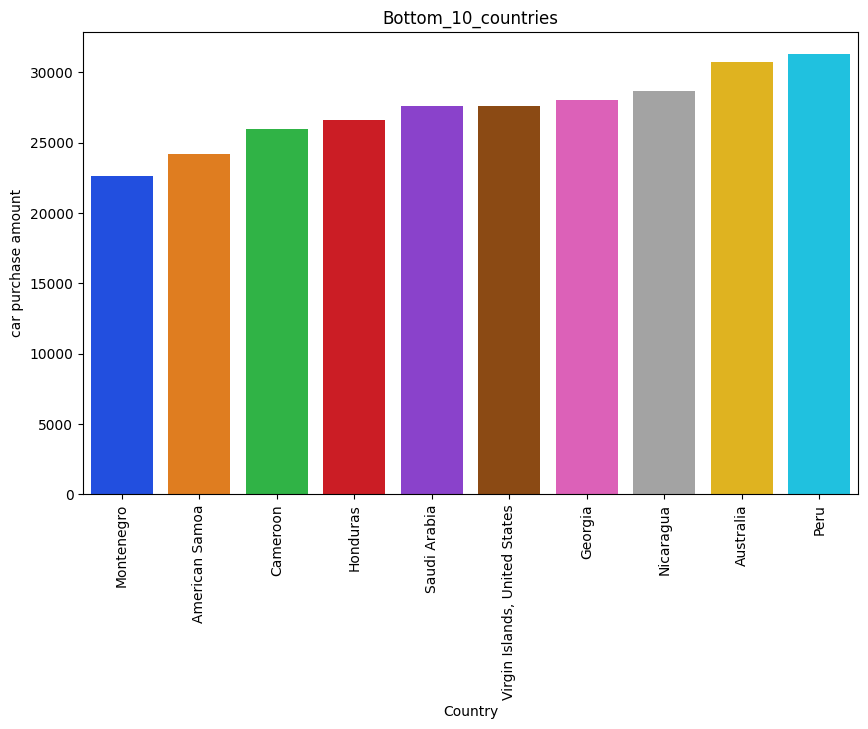

In [ ]:
Bottom_10_countries = data.groupby('country')['car purchase amount'].sum().sort_values(ascending=True).head(10)

Bottom_10_countries = pd.DataFrame({'country':Bottom_10_countries.index, 'car purchase amount':Bottom_10_countries.values})

plt.figure(figsize=(10,6))
sns.barplot(data = Bottom_10_countries, x = 'country', y = 'car purchase amount', palette = 'bright')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('car purchase amount')
plt.title('Bottom_10_countries')
plt.show()


<ipython-input-72-3db578c968f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_countries_per_annual_salary, x = 'country', y = 'annual Salary', palette = 'bright' )


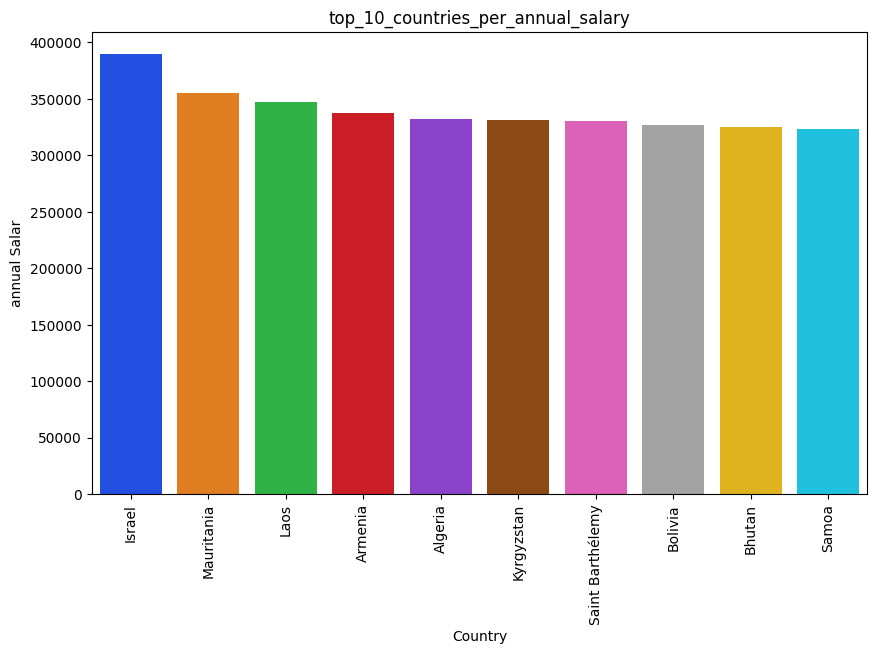

In [ ]:
top_10_countries_per_annual_salary = data.groupby('country')['annual Salary'].sum().sort_values(ascending=False).head(10)

top_10_countries_per_annual_salary = pd.DataFrame({'country':top_10_countries_per_annual_salary.index, 'annual Salary':top_10_countries_per_annual_salary.values})

plt.figure(figsize=(10,6))
sns.barplot(data = top_10_countries_per_annual_salary, x = 'country', y = 'annual Salary', palette = 'bright' )
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('annual Salar')
plt.title('top_10_countries_per_annual_salary')
plt.show()


<ipython-input-73-240f26f4dd7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Bottom_10_countries_per_annual_salary, x = 'country', y = 'annual Salary', palette = 'bright' )


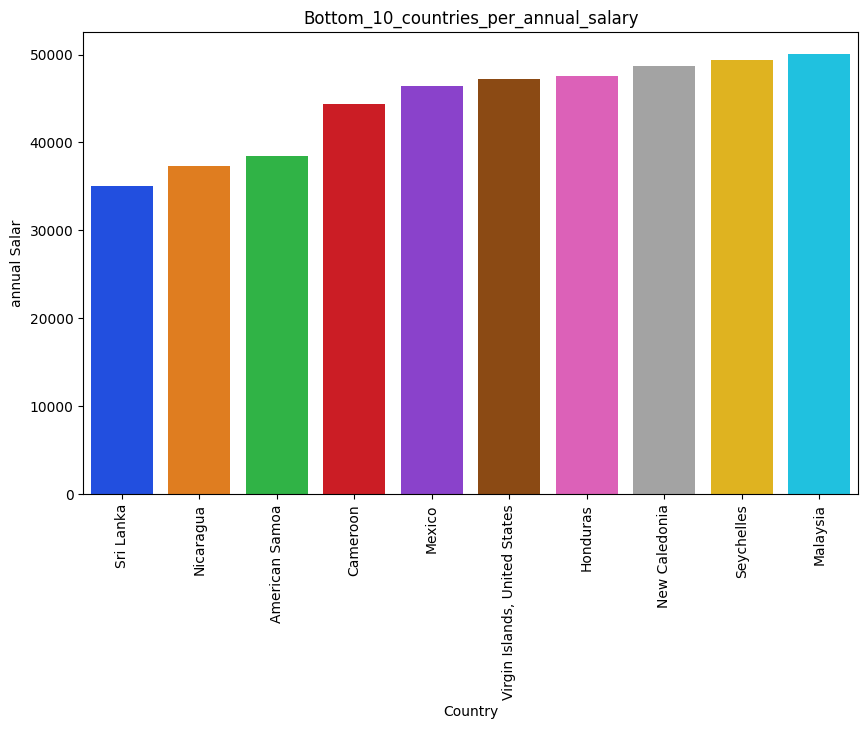

In [ ]:
Bottom_10_countries_per_annual_salary = data.groupby('country')['annual Salary'].sum().sort_values(ascending=True).head(10)

Bottom_10_countries_per_annual_salary = pd.DataFrame({'country':Bottom_10_countries_per_annual_salary.index, 'annual Salary':Bottom_10_countries_per_annual_salary.values})

plt.figure(figsize=(10,6))
sns.barplot(data = Bottom_10_countries_per_annual_salary, x = 'country', y = 'annual Salary', palette = 'bright' )
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('annual Salar')
plt.title('Bottom_10_countries_per_annual_salary')
plt.show()


<ipython-input-74-e5e5b1effc1e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_countries_per_networth, x = 'country', y = 'net worth', palette = 'bright' )


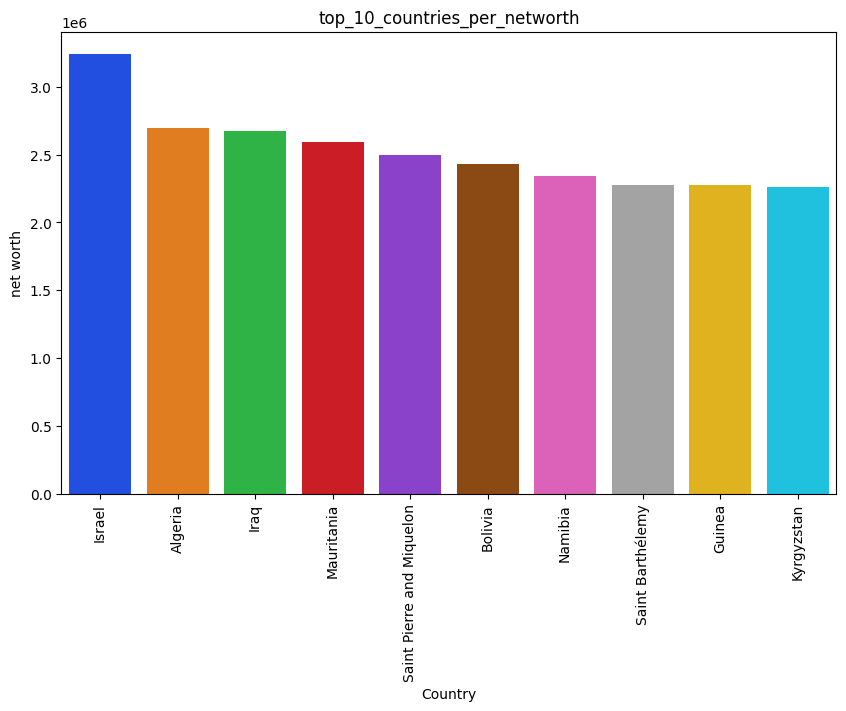

In [ ]:
networth_per_country = data.groupby('country')['net worth'].sum()

top_10_countries_per_networth = networth_per_country.sort_values(ascending=False).head(10)

top_10_countries_per_networth = pd.DataFrame({'country':top_10_countries_per_networth.index, 'net worth':top_10_countries_per_networth.values})
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_countries_per_networth, x = 'country', y = 'net worth', palette = 'bright' )
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('net worth')
plt.title('top_10_countries_per_networth')
plt.show()


The networth of a county is very important because A country with a higher net worth may have more financial flexibility to implement policies that support car sales, such as tax breaks, subsidies for electric vehicles (EVs), or infrastructure improvements like better roads and charging stations for EVs.

<ipython-input-75-78b883af8d2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Bottom_10_countries_per_networth, x = 'country', y = 'net worth', palette = 'bright' )


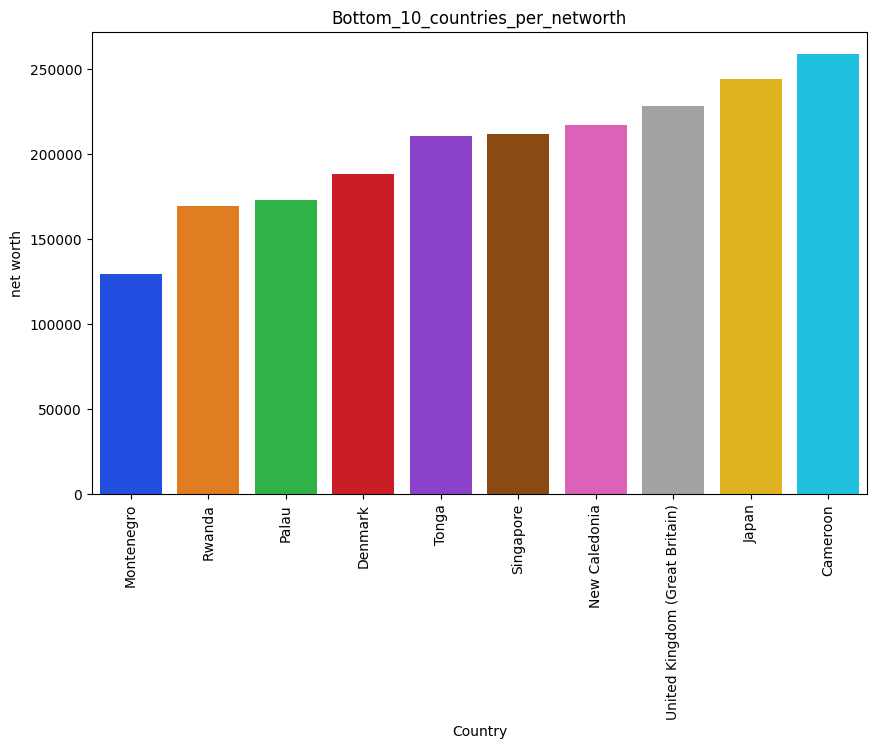

In [ ]:
Bottom_10_countries_per_networth = networth_per_country.sort_values(ascending=True).head(10)

Bottom_10_countries_per_networth = pd.DataFrame({'country':Bottom_10_countries_per_networth.index, 'net worth':Bottom_10_countries_per_networth.values})
plt.figure(figsize=(10,6))
sns.barplot(data = Bottom_10_countries_per_networth, x = 'country', y = 'net worth', palette = 'bright' )
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('net worth')
plt.title('Bottom_10_countries_per_networth')
plt.show()

 In countries with lower economic standing or net worth, consumers may have less disposable income, which can reduce demand for new vehicles, especially expensive or luxury cars. Instead, the demand might shift toward more affordable, fuel-efficient, or used cars.

In [ ]:
Improved_data = data.to_csv('Improved_data.csv')